In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [2]:
"""The problem that I am trying to solve, is the likelihood of whether a specific customer would purchase an item based upon their attributes. These attributes consist of things like gender, age, and 
salary. Ultimately, this is being done in an effort to provide a correct market for which the company can target their advertisements toward. This will be done through the usage of a model which will 
predict whether a customer with certain attributes would or wouldn't purchase the item. Additionally, a return counts as a purchase, which will be important to consider when generating the model."""

"The problem that I am trying to solve, is the likelihood of whether a specific customer would purchase an item based upon their attributes. These attributes consist of things like gender, age, and salary. Ultimately, this is being done in an effort to provide a correct market for which the company can target their advertisements toward. This will be done through the usage of a model which will predict whether a customer with certain attributes would or wouldn't purchase the item. Additionally, a return counts as a purchase, which will be important to consider when generating the model."

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("/home/jupyter-1000790/Project_3/data/Project_3.csv")

"""The data was provided to me in the form of a csv already formatted into headers with a UserID, name, gender, age, salary, and whether they purchased the item. It contains 1000 rows of data, and 
certain headers like ID and Name will likely be removed when the model is trained."""




'The data was provided to me in the form of a csv already formatted into headers with a UserID, name, gender, age, salary, and whether they purchased the item. It contains 1000 rows of data, and certain headers like ID and Name will likely be removed when the model is trained.'

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

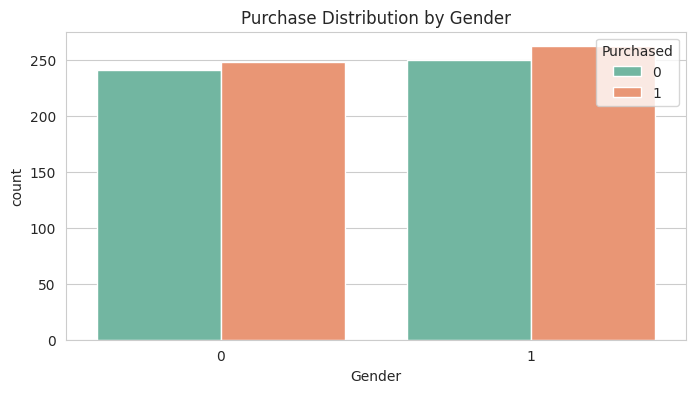

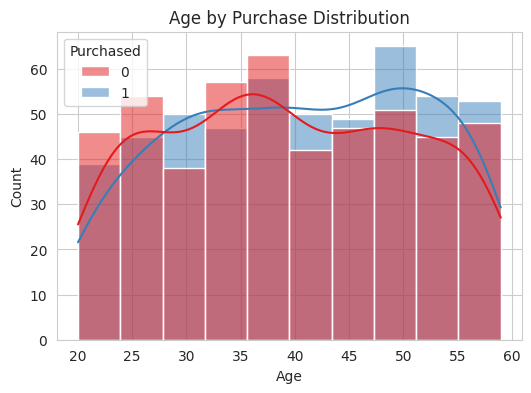

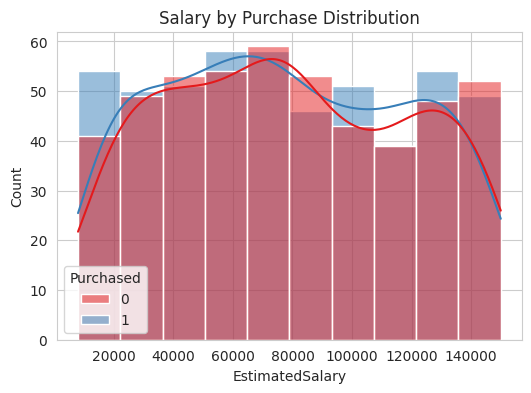

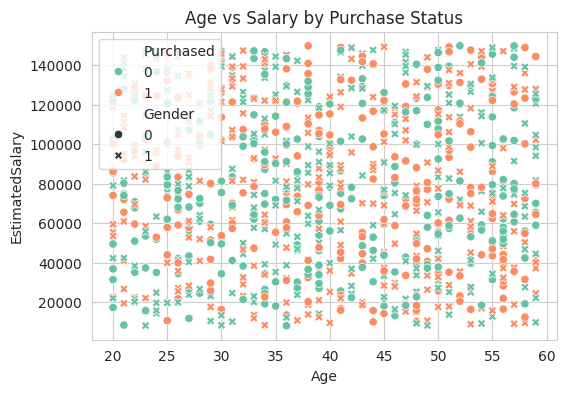

"As I skimmed over the dataset, I noticed that the gender for certain names was messed up. It didn't appear to have a pattern where they were showing the opposite gender, simply that a large quantity of the people just had the wrong gender listed. This caused many of the generated charts to have very little correlation. Additionally, I noticed that age played somewhat of a role through increasing purchase likelihood as it increased, but in all honesty, estimated salary had little to no effect on purchase likelihood. Additionally, when comparing all these factors together, there was almost no correlation, but that could be the fact that it might've been muddled by the error in gender."

In [43]:
df['Purchased'] = df['Purchased'].replace(-1, 1) # (Technically a return is a type of purchase)

plt.figure(figsize=(8,4))
sns.countplot(data=df, x="Gender", hue="Purchased", palette="Set2")
plt.title("Purchase Distribution by Gender")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="Age", hue="Purchased", bins=10, kde=True, palette="Set1")
plt.title("Age by Purchase Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="EstimatedSalary", hue="Purchased", bins=10, kde=True, palette="Set1")
plt.title("Salary by Purchase Distribution")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x="Age", y="EstimatedSalary", hue="Purchased", style="Gender", palette="Set2")
plt.title("Age vs Salary by Purchase Status")
plt.show()

"""As I skimmed over the dataset, I noticed that the gender for certain names was messed up. It didn't appear to have a pattern where they were showing the opposite gender, simply that a large quantity 
of the people just had the wrong gender listed. This caused many of the generated charts to have very little correlation. Additionally, I noticed that age played somewhat of a role through increasing 
purchase likelihood as it increased, but in all honesty, estimated salary had little to no effect on purchase likelihood. Additionally, when comparing all these factors together, there was almost no 
correlation, but that could be the fact that it might've been muddled by the error in gender."""

# 4.Prepare the Data


Apply any data transformations and explain what and why


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

one_hot_encoder = LabelEncoder()
df['Gender'] = one_hot_encoder.fit_transform(df['Gender'])

x = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=36)


"""The only real transformation I made to the data, was encoding the gender to resemble 1s and 0s so that it would be usable for the model in the next step. Other than that, I didn't make any other 
transformations that I thought were necessary."""

"The only real transformation I made to the data, was encoding the gender to resemble 1s and 0s so that it would be usable for the model in the next step. Other than that, I didn't make any other transformations that I thought were necessary."

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# model = LogisticRegression(random_state=36, max_iter=500) #Version 1.0 (Basic Logistic Regression, 47.9%)
# model.fit(x_train, y_train)

# pred = model.predict(x_test)

# print("V 1.0 - Logistic Regression")
# print("Accuracy: ", round(accuracy_score(y_test, pred), 4))
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))

# model = KNeighborsClassifier(n_neighbors=5) #Version 1.1 (K-Nearest Neighbors, 52.2%)
# model.fit(x_train, y_train)

# pred = model.predict(x_test)

# print("V 1.1 - K-Nearest Neighbors")
# print("Accuracy:", round(accuracy_score(y_test, pred), 4))
# print(confusion_matrix(y_test, pred))
# print(classification_report(y_test, pred))



model = RandomForestClassifier(random_state=36) # Version 1.1 (Default Random Forest w/o Fined Tuned Hyperparameters, 52.7%)
model.fit(x_train, y_train)

pred = model.predict(x_test)

print("V 1.2 - Random Forest")
print("Accuracy:", round(accuracy_score(y_test, pred), 4))
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))








V 1.1 - K-Nearest Neighbors
Accuracy: 0.5224
[[43 49]
 [47 62]]
              precision    recall  f1-score   support

           0       0.48      0.47      0.47        92
           1       0.56      0.57      0.56       109

    accuracy                           0.52       201
   macro avg       0.52      0.52      0.52       201
weighted avg       0.52      0.52      0.52       201



# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 